In [6]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import scipy
from pylab import rcParams
import urllib
import sklearn
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [7]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [8]:
df['grade_sqft_product'] = df['grades'] * df['sqft_living']

In [80]:
#columns for regression
relevant_columns = [
    'grades',
    'sqft_living',# Linear feet of street connected to property
    'condition',      # Lot size in square feet
    'waterfront',       # Type of road access to property
    'sqft_basment_calc',  # Rates the overall material and finish of the house
    'sqft_lot15',  # Rates the overall condition of the house
    'sqft_living15',
    'zipcode',# Original construction date
    'long', # Remodel date (same as construction date if no remodeling or additions)
    'lat',    # Above grade (ground) living area square feet
    'yr_renovated',     # Full bathrooms above grade
    'yr_built', # Bedrooms above grade (does NOT include basement bedrooms)
    'floors', # Total rooms above grade (does not include bathrooms)
    'sqft_lot',   # Number of fireplaces
    'bathrooms',  # Fireplace quality
    'bedrooms',       # Month Sold (MM)       # Year Sold (YYYY)
]

In [10]:
regression_categories = df[relevant_columns]

In [11]:
y = df['price']
X = regression_categories

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#our linear regression model & train performance
model = LinearRegression()
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=3)

array([0.66581133, 0.67045839, 0.65608175])

In [14]:
#our linear model performance against test data
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6516151224865679

In [15]:
#predictions of y based on linear model of x-test
y_pred=model.predict(X_test)
y_pred

array([  84108.81506161,  384420.86225253,  210026.94606727, ...,
       1205988.36663813, 1513500.01958509,  189796.2981282 ])

In [16]:
#linear model performance
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 65.16


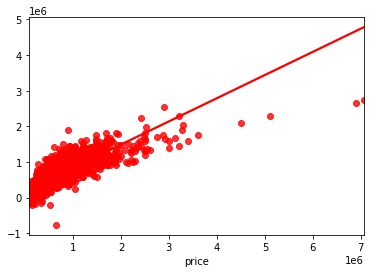

In [17]:
#plot of linear model
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [18]:
#df of predicted values vs actual values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [19]:
pred_df

,Actual Value,Predicted Value,Difference
3686,132500.0,8.410882e+04,48391.184938
10247,415000.0,3.844209e+05,30579.137747
4037,494000.0,2.100269e+05,283973.053933
3437,355000.0,2.649488e+05,90051.186197
19291,606000.0,4.352640e+05,170735.960524
...,...,...,...
18276,397000.0,2.460375e+05,150962.525239
15003,615000.0,5.194667e+05,95533.297612
13478,1330000.0,1.205988e+06,124011.633362
18399,784500.0,1.513500e+06,-729000.019585


In [20]:
#df of houses that sold for over the predicted sale price
over_linear_prediction_df = pred_df.loc[pred_df['Difference'] > 0]

In [21]:
#df of houses that sold for under the predicted sale price
under_linear_prediction_df = pred_df.loc[pred_df['Difference'] < 0]

In [22]:
#predicting with random forest
lr = RandomForestRegressor(n_estimators=15)
lr.fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.87


In [23]:
rf_y_pred = lr.predict(X_test)

In [24]:
#random forest model performance (by r-square), not sure if that's right
Accuracy=r2_score(y_test,rf_y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 87.18


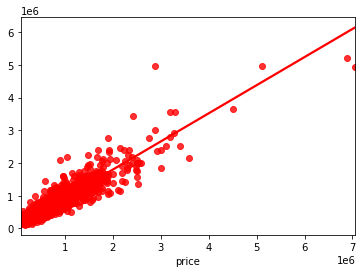

In [25]:
#linear model performance
sns.regplot(x=y_test,y=rf_y_pred,ci=None,color ='red');

In [26]:
#df of predicted values vs actual values
rf_pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [27]:
#df of houses that sold for over the predicted sale price
over_rf_prediction_df = rf_pred_df.loc[rf_pred_df['Difference'] > 0]

In [28]:
#df of houses that sold for under the predicted sale price
under_rf_prediction_df = rf_pred_df.loc[rf_pred_df['Difference'] < 0]

In [33]:
#df of original data at indexes of test data
df_rf_preds_w_columns = df[df.index.isin(rf_pred_df.index)]

In [68]:
#x and y for graphs of test data
y_test_graph = df_rf_preds_w_columns['price']
rf_y_pred_graph = lr.predict(df_rf_preds_w_columns[relevant_columns])

In [ ]:
#need to take a look at hue_order and hue_norm args

In [97]:
[df_rf_preds_w_columns['bathrooms'].value_counts()]

[2.50    1339
 1.00     973
 1.75     752
 2.25     519
 2.00     497
 1.50     348
 2.75     306
 3.00     182
 3.50     181
 3.25     148
 3.75      46
 4.00      25
 4.50      20
 0.75      18
 4.25      15
 5.00       7
 5.50       5
 1.25       4
 4.75       4
 6.00       3
 5.25       3
 6.25       2
 7.50       1
 7.75       1
 5.75       1
 Name: bathrooms, dtype: int64]

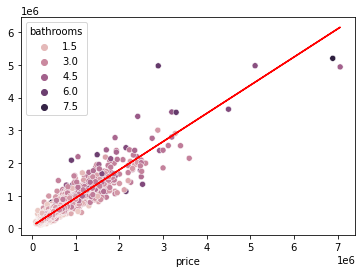

In [114]:
#graph of test data, with hue set to column name. attempting to use this to see if there are trends in column that lead to greater sell price than expected
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='bathrooms', hue_norm=(.75, 7.75))
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

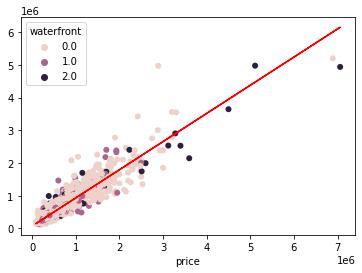

In [77]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='waterfront', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

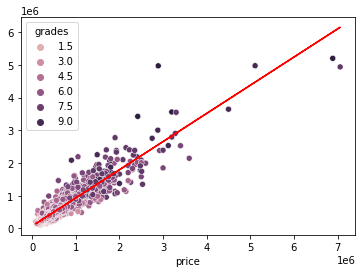

In [115]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='grades', hue_norm=(0, 10))
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

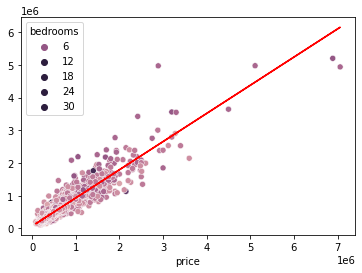

In [122]:
bed = sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='bedrooms', hue_norm=(0, 10))
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

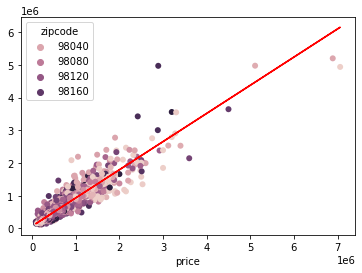

In [81]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='zipcode', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

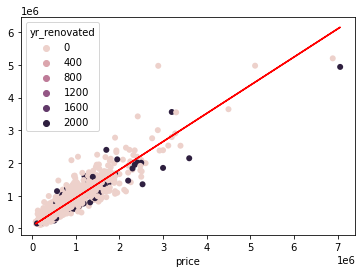

In [82]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='yr_renovated', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

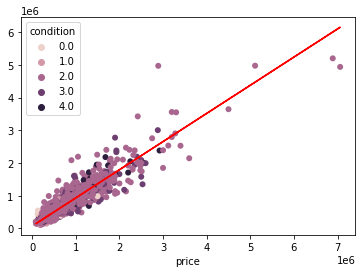

In [83]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='condition', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

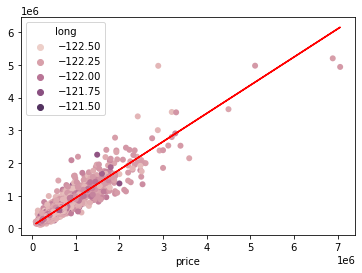

In [84]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='long', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

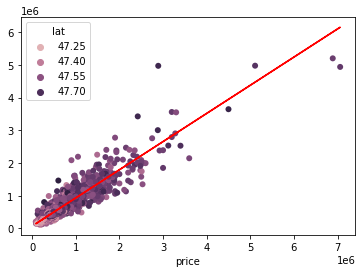

In [85]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='lat', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

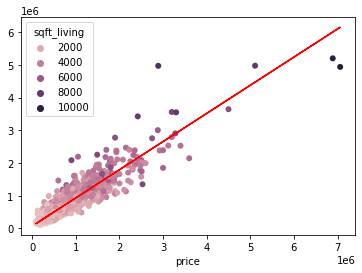

In [86]:
sns.scatterplot(x=y_test_graph, y=rf_y_pred_graph, data=df_rf_preds_w_columns, hue='sqft_living', ec=None)
theta = np.polyfit(y_test_graph, rf_y_pred_graph, 1)
y_line = theta[1] + theta[0] * y_test_graph
plt.plot(y_test_graph, y_line, 'r')

In [87]:
overs_df = df[df.index.isin(over_rf_prediction_df.index)]
unders_df = df[df.index.isin(under_rf_prediction_df.index)]

In [123]:
overs_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition,grade_sqft_product
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0,7840.0
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0,4.0,0.0,2.0,6860.0
19,230000.0,3,1.00,1250,9774,1.0,1250,1969,0.0,98003,47.3343,-122.306,1280,8850,0,4.0,0.0,3.0,5000.0
44,309000.0,3,1.00,1280,9656,1.0,920,1959,0.0,98058,47.4485,-122.175,1340,8808,360,3.0,0.0,3.0,3840.0
46,210490.0,3,1.00,990,8528,1.0,990,1966,0.0,98023,47.3066,-122.371,1228,8840,0,3.0,0.0,2.0,2970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,270000.0,3,2.50,1870,5000,2.0,1870,2009,0.0,98042,47.3339,-122.055,2170,5399,0,4.0,0.0,2.0,7480.0
21584,1540000.0,5,3.75,4470,8088,2.0,4470,2008,0.0,98004,47.6321,-122.200,2780,8964,0,8.0,0.0,2.0,35760.0
21585,467000.0,3,2.50,1425,1179,3.0,1425,2008,0.0,98125,47.6963,-122.318,1285,1253,0,5.0,0.0,2.0,7125.0
21586,224000.0,3,1.75,1500,11968,1.0,1500,2014,0.0,98010,47.3095,-122.002,1320,11303,0,3.0,1.0,2.0,4500.0


In [124]:
unders_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition,grade_sqft_product
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,1.0,2.0,4720.0
17,485000.0,4,1.00,1600,4300,1.5,1600,1916,0.0,98103,47.6648,-122.343,1610,4300,0,4.0,0.0,3.0,6400.0
31,280000.0,2,1.50,1190,1265,3.0,1190,2005,0.0,98133,47.7274,-122.357,1390,1756,0,4.0,0.0,2.0,4760.0
34,322500.0,4,2.75,2060,6659,1.0,1280,1981,0.0,98058,47.4276,-122.157,2020,8720,780,4.0,0.0,2.0,8240.0
35,696000.0,3,2.50,2300,3060,1.5,1510,1930,2002.0,98115,47.6827,-122.310,1590,3264,790,5.0,0.0,2.0,11500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21559,399950.0,3,2.50,3087,5002,2.0,3087,2014,0.0,98023,47.2974,-122.349,2927,5183,0,5.0,0.0,2.0,15435.0
21564,594866.0,3,3.00,2780,6000,2.0,2780,2013,0.0,98065,47.5184,-121.886,2850,6000,0,6.0,0.0,2.0,16680.0
21565,625000.0,3,3.00,2780,6000,2.0,2780,2013,1.0,98065,47.5184,-121.886,2850,6000,0,6.0,0.0,2.0,16680.0
21571,385000.0,3,2.50,1520,1488,3.0,1520,2006,0.0,98125,47.7337,-122.309,1520,1497,0,5.0,0.0,2.0,7600.0


In [ ]:
overs_df.loc[overs_df['bathrooms']]